In [8]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as pt
import seaborn as sns
%matplotlib inline

#Creating a dataset "data" for reading the .csv file
dataset = pd.read_excel('../data/UCI_Credit_Card.xls')

#to read excel file
#dataset = pd.read_excel('UCI_Credit_Card.xlsx', sheetname='Sheet1')

dataset.shape
# We have 30,000 records with 25 columns 

(30001, 25)

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 25 columns):
Unnamed: 0    30001 non-null object
X1            30001 non-null object
X2            30001 non-null object
X3            30001 non-null object
X4            30001 non-null object
X5            30001 non-null object
X6            30001 non-null object
X7            30001 non-null object
X8            30001 non-null object
X9            30001 non-null object
X10           30001 non-null object
X11           30001 non-null object
X12           30001 non-null object
X13           30001 non-null object
X14           30001 non-null object
X15           30001 non-null object
X16           30001 non-null object
X17           30001 non-null object
X18           30001 non-null object
X19           30001 non-null object
X20           30001 non-null object
X21           30001 non-null object
X22           30001 non-null object
X23           30001 non-null object
Y             30001 non-nul

In [10]:
#Rename one of the columns
dataset = dataset.rename(columns = {'default payment next month':'payment_default'})
dataset.columns

#View the data
dataset.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [4]:
#Checking the number of Null entries in the data columnwise.
total = dataset.isnull().sum().sort_values(ascending = False)
pd.concat([total], axis=1, keys=['Total']).transpose()

,payment_default,PAY_6,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,ID
Total,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#Converting all the columns to small case for ease of coding 
dataset.columns = map(str.lower, dataset.columns)

In [11]:
#Checking the number of counts of defaulters and non defaulters sexwise
bar = sns.countplot(x='sex', data=dataset, hue="payment_default", palette="muted")
#It is evident from the above output that females have overall less default payments wrt males

ValueError: Could not interpret input 'sex'

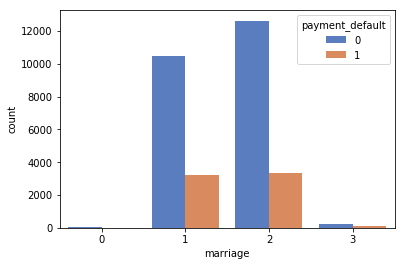

In [7]:
bar = sns.countplot(x="marriage", data=dataset, hue="payment_default", palette="muted")
#From the above plot it is clear that those people who have marital status single 
#have less default payment with respect to married status people.

C:\Users\Apurva\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


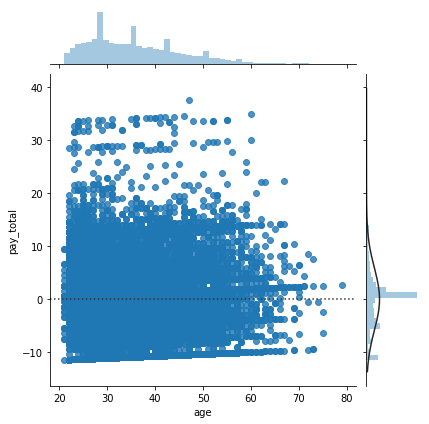

In [9]:
#lets add a column pay_total. This has total number of payments done or missed. 
dataset['pay_total'] = (dataset.pay_0 + dataset.pay_2 + dataset.pay_3 + dataset.pay_4 + dataset.pay_5 + dataset.pay_6);
sns.jointplot("age", "pay_total", dataset, kind = 'resid');

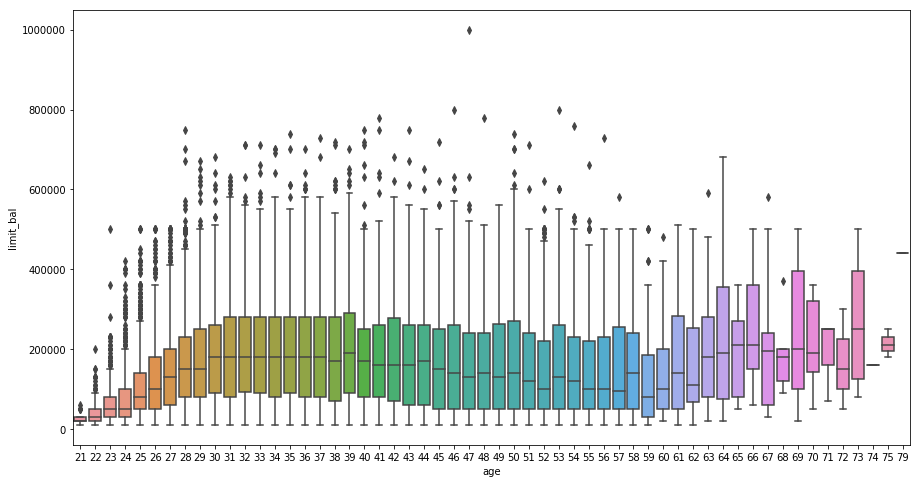

In [10]:
pt.figure(figsize=(15,8))
sns.boxplot(x='age', y='limit_bal', data=dataset)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F2E4FF1518>,
      dtype=object)

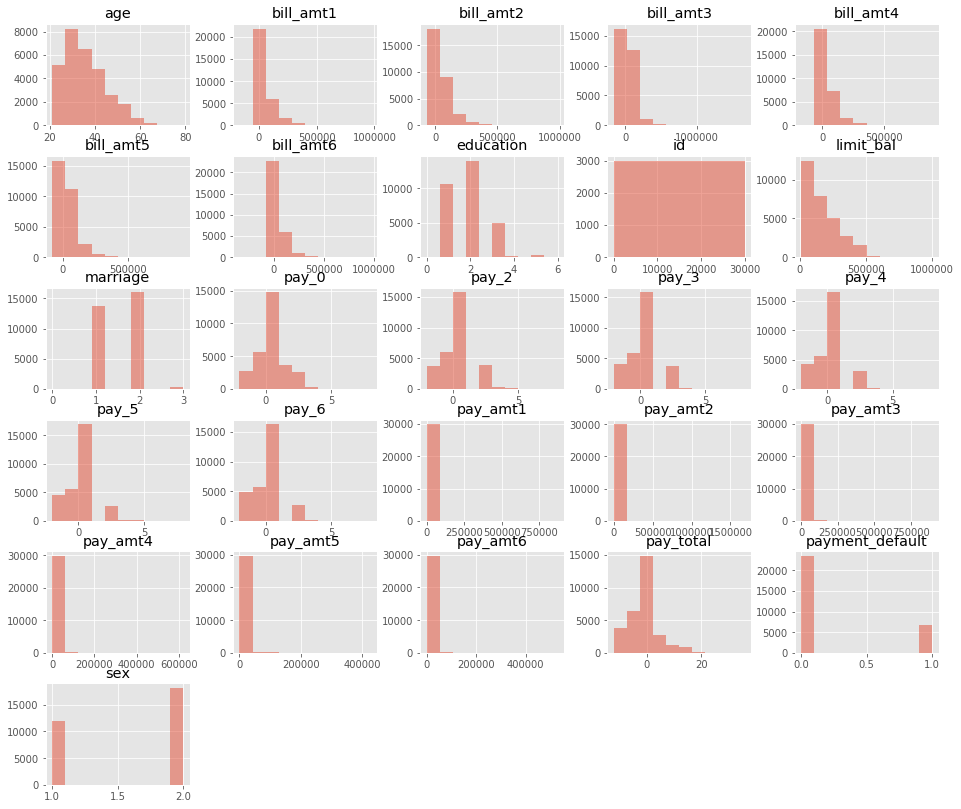

In [11]:
matplotlib.style.use('ggplot')
dataset.hist(alpha=0.5, figsize=(16, 14))